In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] =='United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

132646     94000.0
491049    165000.0
321838     63500.0
638804     99150.0
735386    102500.0
312511     82500.0
617204     87500.0
541360     70000.0
498234    109750.0
433206    109164.0
Name: salary_year_avg, dtype: float64

<Axes: >

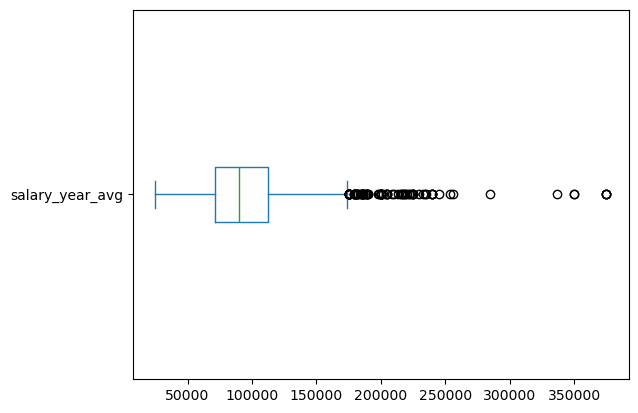

In [5]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert=False) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1653dc4e120>,
 'caps': [<matplotlib.lines.Line2D at 0x1653dc4e630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1653dc4de50>],
 'medians': [<matplotlib.lines.Line2D at 0x1653dc4eba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1653dc4ee40>],
 'means': []}

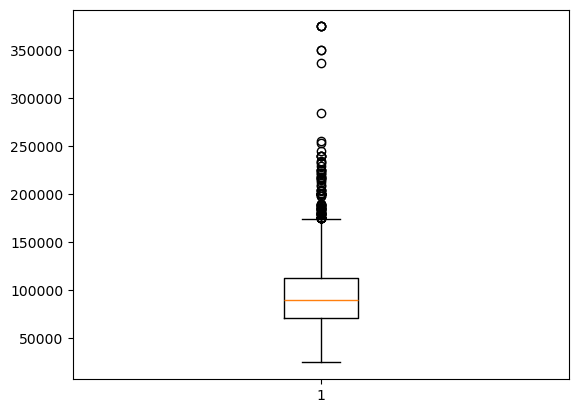

In [ ]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\rupeg\AppData\Local\Temp\ipykernel_6760\3791142095.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels =job_titles, vert =False)


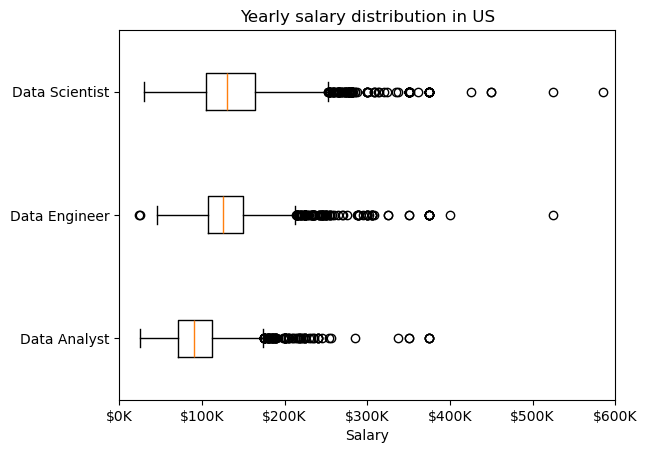

In [18]:
job_titles= ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] =='United States')].copy()
df_US = df_US.dropna(subset= ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels =job_titles, vert =False)
plt.title('Yearly salary distribution in US')
plt.ylabel("")
plt.xlabel("Salary")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [13]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64